In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [212]:
### MASS FLOWS AFTER FERMENTATION
#strep, water, nh3, oxygen, glucose
init = [930.5, 2147.4, 47.7, 19.2, 252.2]


### PROCESSES
def freeze_dry(masses):
    strep, water, nh3, oxygen, glucose = masses
    #remove all remaining water from the system
    water = 0.1*water
    masses = strep, water, nh3, oxygen, glucose
    return(masses)


def purification(masses):
    strep, water, nh3, oxygen, glucose = masses
    #figure out how to edit certain parts
    new_water = 0.2*water
    new_nh3 = 0.2*nh3
    new_oxygen = 0.2*oxygen
    new_glucose = 0.2 *glucose
    #strep gets at least 80% retiained plus random variation for up to 90%
    new_strep = strep*(0.8+random.randint(1,10)/100.0)
    
    new_masses = new_strep, new_water, new_nh3, new_oxygen, new_glucose 
    
    recycle = []
    for index in range(len(masses)):
        recycle.append(masses[index]-new_masses[index])
        
    return(new_masses,recycle)

def evaporate(masses):
    strep, water, nh3, oxygen, glucose = masses
    #evaporate almost all the oxygen
    oxygen = 0.01*oxygen
    masses = strep, water, nh3, oxygen, glucose 
    return(masses)

def acid_neut(masses):
    strep, water, nh3, oxygen, glucose = masses
    nh3 = 0.1*nh3    
    masses = strep, water, nh3, oxygen, glucose 
    return(masses)


In [213]:
steps = [0,1,2,3,4]

In [214]:
#generate all the masses value
masses = []
#0 - ferementation
masses.append(init)
#1 - evaporation
masses.append(evaporate(masses[0]))
#2 - purification 1
masses.append(purification(masses[1])[0])
#3 - recycle 

sum_list = []


for (item1, item2) in zip(masses[2], purification(purification(masses[1])[1])[0]):
    sum_list.append(item1+item2)


masses.append(sum_list)
#4 - freeze dry
masses.append(freeze_dry(masses[3]))


In [215]:
#get all the values for each component
#strep, water, nh3, oxygen, glucose
streps = []
waters = []
nh3s = []
oxygens = []
glucoses = []

for mass in masses:
    streps.append(mass[0])
    waters.append(mass[1])
    nh3s.append(mass[2])
    oxygens.append(mass[3])
    glucoses.append(mass[4])

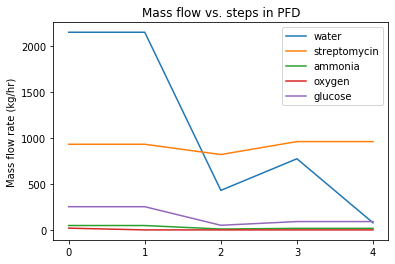

In [216]:
plt.plot(steps,waters)
plt.plot(steps,streps)
plt.plot(steps,nh3s)
plt.plot(steps,oxygens)
plt.plot(steps,glucoses)
plt.legend(["water","streptomycin","ammonia","oxygen","glucose"])
plt.title("Mass flow vs. steps in PFD")
plt.ylabel("Mass flow rate (kg/hr)")
plt.locator_params(axis="both", integer=True, tight=True)#so that x axis is only interger values


In [217]:
strep_frac =[]
water_frac = []
nh3_frac = []
oxygen_frac = []
glucose_frac = []
for mass in masses:
    strep_frac.append(mass[0]/sum(mass))
    water_frac.append(mass[1]/sum(mass))
    nh3_frac.append(mass[2]/sum(mass))
    oxygen_frac.append(mass[3]/sum(mass))
    glucose_frac.append(mass[4]/sum(mass))

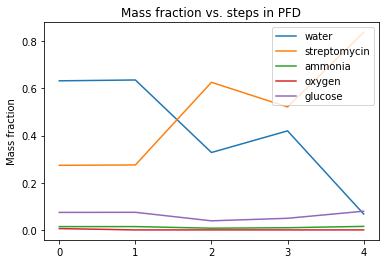

In [219]:
plt.plot(steps,water_frac)
plt.plot(steps,strep_frac)
plt.plot(steps,nh3_frac)
plt.plot(steps,oxygen_frac)
plt.plot(steps,glucose_frac)
plt.legend(["water","streptomycin","ammonia","oxygen","glucose"])
plt.ylabel("Mass fraction")
plt.title("Mass fraction vs. steps in PFD")
plt.locator_params(axis="both", integer=True, tight=True)#so that x axis is only interger values


In [172]:
init

[930.5, 2147.4, 47.7, 19.2, 252.2]

In [176]:
init + init

[930.5, 2147.4, 47.7, 19.2, 252.2, 930.5, 2147.4, 47.7, 19.2, 252.2]

In [223]:
strep_frac

[0.2739181630850751,
 0.2754595037525252,
 0.6258625444304011,
 0.5213064370743927,
 0.8381132017724405]

In [192]:
masses[2]

(781.6200000000001, 858.96, 9.540000000000001, 0.038400000000000004, 50.44)

In [222]:
masses[4]

(959.5316, 77.30640000000001, 17.172000000000004, 0.06912000000000001, 90.792)